<div>
    <img src="https://matplotlib.org/stable/_static/logo_light.svg" width="750">
</div>

# Outline <a class="anchor" id="Outline"></a>

* [Quick start guide](#Quick_start_guide)
    * [A simple example](#A_simple_example)
    * [Parts of a Figure](#Parts_of_a_Figure)
        * [`matplotlib.figure.Figure`](#matplotlib.figure.Figure)
        * [`matplotlib.axes.Axes`](#matplotlib.axes.Axes)
        * [`matplotlib.axis.Axis`](#matplotlib.axis.Axis)
        * [`matplotlib.artist.Artist`](#matplotlib.artist.Artist)
    * [Types of inputs to plotting functions](#Types_of_inputs_to_plotting_functions)
    * [Coding styles](#Coding_styles)
        * [The explicit and the implicit interfaces](#The_explicit_and_the_implicit_interfaces)
        * [Making a helper functions](#Making_a_helper_functions)
    * [Styling Artists](#Styling_Artists)
        * [Colors](#Colors)
        * [Linewidths, linestyles, and markersizes](#Linewidths_linestyles_and_markersizes)
    * [Labelling plots](#Labelling_plots)
        * [Axes labels and text](#Axes_labels_and_text)
        * [Using mathematical expressions in text](#Using_mathematical_expressions_in_text)
        * [Annotations](#Annotations)
        * [Legends](#Legends)
    * [Axis scales and ticks](#Axis_scales_and_ticks)
        * [Scales](#Scales)
        * [Tick locators and formatters](#Tick_locators_and_formatters)
        * [Plotting dates and strings](#Plotting_dates_and_strings)
        * [Additional Axis objects](#Additional_Axis_objects)
    * [Color mapped data](#Color_mapped_data)
        * [Colormaps](#Colormaps)
        * [Normalizations](#Normalizations)
        * [Colorbars](#Colorbars)
    * [Working with multiple Figures and Axes](#Working_with_multiple_Figures_and_Axes)

# Quick start guide <a class="anchor" id="Quick_start_guide"></a> [&#11014;](#Outline)

This tutorial covers some basic usage patterns and best practices to help you get started with `Matplotlib`.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## A simple example <a class="anchor" id="A_simple_example"></a> [&#11014;](#Outline)

`Matplotlib` graphs your data on `.Figure`s (e.g., Windows, Jupyter widgets, etc.), each of which can contain one or more `~.axes.Axes`, an area where points can be specified in terms of *x*-*y* coordinates (or $\mathrm{\theta}$-*r* in a polar plot, *x*-*y*-*z* in a 3D plot, etc.).  The simplest way of creating a Figure with an Axes is using `.pyplot.subplots`. We can then use `.Axes.plot` to draw some data on the Axes:

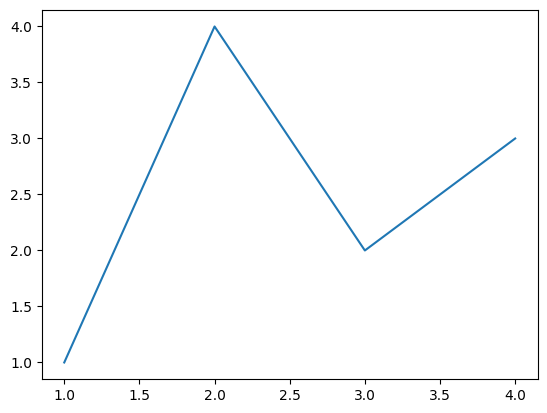

In [2]:
# Create a figure containing a single axes.
fig, ax = plt.subplots()

# Plot some data on the axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);

Note that to get this Figure to display, you may have to call `plt.show()`, depending on your backend.

## Parts of a Figure <a class="anchor" id="Parts_of_a_Figure"></a> [&#11014;](#Outline)

Here are the components of a Matplotlib Figure.

<div>
    <center>
        <img src="https://matplotlib.org/stable/_static/anatomy.png">
    </center>
</div>

### `matplotlib.figure.Figure` <a class="anchor" id="matplotlib.figure.Figure"></a> [&#11014;](#Outline)

The **whole** figure. The Figure keeps track of all the child class `matplotlib.axes.Axes`, a group of 'special' Artists (*titles*, *figure legends*, *colorbars*, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:
<div class="alert alert-block alert-warning">

```python
# an empty figure with no Axes
fig = plt.figure()

# a figure with a single Axes
fig, ax = plt.subplots()

# a figure with a 2x2 grid of Axes
fig, axs = plt.subplots(2, 2, layout="constrained")

# a figure with one axes on the left, and two on the right
fig, axs = plt.subplot_mosaic(
    [
        ["left", "right_top"],
        ["left", "right_bottom"],
    ],
    layout="constrained",
);
```
</div>

It is often convenient to create the Axes together with the Figure, but you can also manually add Axes later on. Note that many [`Matplotlib backends`](https://matplotlib.org/stable/users/explain/backends.html) support zooming and panning on figure windows.

### `matplotlib.axes.Axes` <a class="anchor" id="matplotlib.axes.Axes"></a> [&#11014;](#Outline)

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) `matplotlib.axis.Axis` objects (be aware of the difference between **Axes** and **Axis**) that provide ticks and tick labels to provide scales for the data in the Axes. Each `matplotlib.axes.Axes` also has a title (set via method `~.Axes.set_title`), an x-label (set via method `~.Axes.set_xlabel`), and a y-label set via method `~.Axes.set_ylabel`).

The `matplotlib.axes.Axes` class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. ``ax.plot()``, shown above, uses the `~.Axes.plot` method)

### `matplotlib.axis.Axis` <a class="anchor" id="matplotlib.axis.Axis"></a> [&#11014;](#Outline)

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks).  The location of the ticks is determined by a `~matplotlib.ticker.Locator` object and the ticklabel strings are formatted by a `~matplotlib.ticker.Formatter`.  The combination of the correct `.Locator` and `.Formatter` gives very fine control over the tick locations and labels.

### `matplotlib.artist.Artist` <a class="anchor" id="matplotlib.artist.Artist"></a> [&#11014;](#Outline)

Basically, everything visible on the Figure is an Artist (even `.Figure`, `Axes <.axes.Axes>`, and `~.axis.Axis` objects).  This includes `.Text` objects, `.Line2D` objects, [`matplotlib.collections`](https://matplotlib.org/stable/api/collections_api.html#module-matplotlib.collections) objects, `.Patch` objects, etc. When the Figure is rendered, all of the Artists are drawn to the **canvas**.  Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

## Types of inputs to plotting functions <a class="anchor" id="Types_of_inputs_to_plotting_functions"></a> [&#11014;](#Outline)

Plotting functions expect `numpy.array` or `numpy.ma.masked_array` as input, or objects that can be passed to `numpy.asarray`. Classes that are similar to arrays ('array-like') such as `pandas` data objects and `numpy.matrix` may not work as intended.  Common convention is to convert these to `numpy.array` objects prior to plotting.
<div class="alert alert-block alert-warning">

For example, to convert a `numpy.matrix`:
```python
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
```
</div>

Most methods will also parse an addressable object like a *dict*, a `numpy.recarray`, or a `pandas.DataFrame`.  Matplotlib allows you to provide the ``data`` keyword argument and generate plots passing the strings corresponding to the *x* and *y* variables.

In [3]:
# seed the random number generator.
np.random.seed(19680801)

In [4]:
data = {"a": np.arange(50), "c": np.random.randint(0, 50, 50), "d": np.random.randn(50)}
data["b"] = data["a"] + 10 * np.random.randn(50)
data["d"] = np.abs(data["d"]) * 100

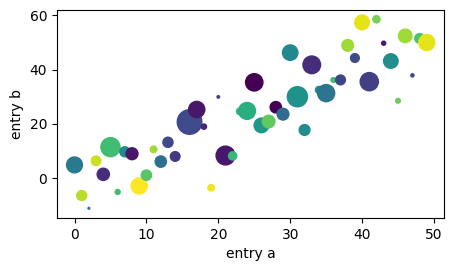

In [5]:
fig, ax = plt.subplots(figsize=(5, 2.7))

ax.scatter("a", "b", c="c", s="d", data=data)

ax.set_xlabel("entry a")
ax.set_ylabel("entry b");

## Coding styles <a class="anchor" id="Coding_styles"></a> [&#11014;](#Outline)

### The explicit and the implicit interfaces <a class="anchor" id="The_explicit_and_the_implicit_interfaces"></a> [&#11014;](#Outline)

As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

So one can use the OO style

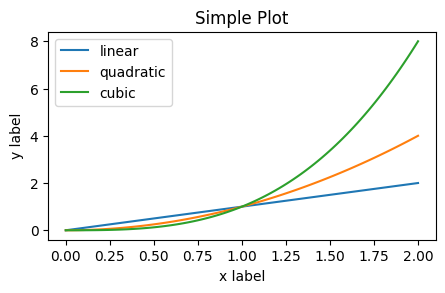

In [6]:
# Sample data.
x = np.linspace(0, 2, 100)

# Note that even in the OO style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7))

# Plot some data on the axes.
ax.plot(x, x, label="linear")
# Plot more data on the axes...
ax.plot(x, x**2, label="quadratic")
# ... and some more.
ax.plot(x, x**3, label="cubic")

# Add an x-label to the axes.
ax.set_xlabel("x label")
# Add a y-label to the axes.
ax.set_ylabel("y label")
# Add a title to the axes.
ax.set_title("Simple Plot")
# Add a legend.
ax.legend()

or the pyplot style

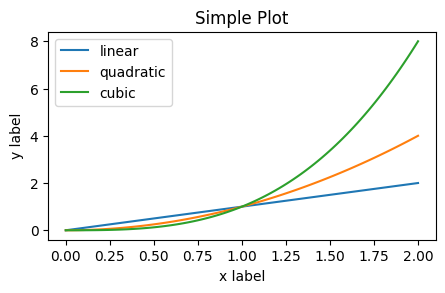

In [7]:
# Sample data.
x = np.linspace(0, 2, 100)

plt.figure(figsize=(5, 2.7))

# Plot some data on the (implicit) axes.
plt.plot(x, x, label="linear")
# Plot more data on the (implicit) axes...
plt.plot(x, x**2, label="quadratic")
# ... and some more.
plt.plot(x, x**3, label="cubic")

# Add an x-label to the (implicit) axes.
plt.xlabel("x label")
# Add a y-label to the (implicit) axes.
plt.ylabel("y label")
# Add a title to the (implicit) axes.
plt.title("Simple Plot")
# Add a legend.
plt.legend()

Matplotlib's documentation and examples use both the OO and the pyplot
styles. In general, we suggest using the OO style, particularly for
complicated plots, and functions and scripts that are intended to be reused
as part of a larger project. However, the pyplot style can be very convenient
for quick interactive work.

<div class="alert alert-info">

<h4>Note</h4>

You may find older examples that use the `pylab` interface, via `from pylab import *`. This approach is strongly deprecated.</div>

### Making a helper functions <a class="anchor" id="Making_a_helper_functions"></a> [&#11014;](#Outline)

If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

In [8]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """

    out = ax.plot(data1, data2, **param_dict)

    return out

which you would then use twice to populate two subplots:



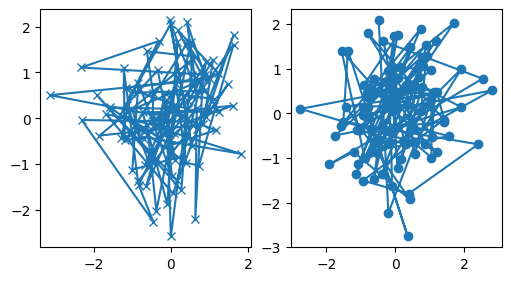

In [9]:
# make 4 random data sets
data1, data2, data3, data4 = np.random.randn(4, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7), layout="constrained")

my_plotter(ax1, data1, data2, {"marker": "x"})
my_plotter(ax2, data3, data4, {"marker": "o"});

Note that if you want to install these as a python package, or any other
customizations you could use one of the many templates on the web;
Matplotlib has one at [`mpl-cookiecutter`](https://github.com/matplotlib/matplotlib-extension-cookiecutter)

## Styling Artists <a class="anchor" id="Styling_Artists"></a> [&#11014;](#Outline)

Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist.  In the plot below we manually set the *color*, *linewidth*, and *linestyle* of the Artists created by `~.Axes.plot`, and we set the linestyle of the second line after the fact with `~.Line2D.set_linestyle`.

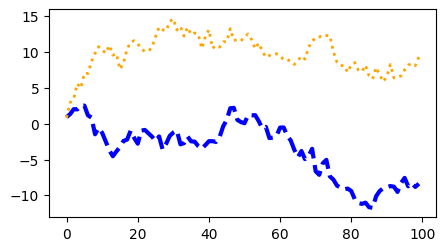

In [10]:
x = np.arange(len(data1))

fig, ax = plt.subplots(figsize=(5, 2.7))

ax.plot(x, np.cumsum(data1), color="blue", linewidth=3, linestyle="--")

(l,) = ax.plot(x, np.cumsum(data2), color="orange", linewidth=2)
l.set_linestyle(":")

### Colors <a class="anchor" id="Colors"></a> [&#11014;](#Outline)

Matplotlib has a very flexible array of colors that are accepted for most Artists; see the [`colors tutorial`](https://matplotlib.org/stable/tutorials/colors/colors) for a list of specifications. Some Artists will take multiple colors. i.e. for a `~.Axes.scatter` plot, the edge of the markers can be different colors from the interior:

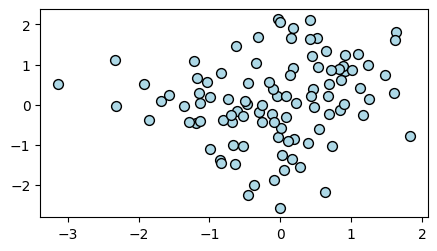

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7))

ax.scatter(data1, data2, s=50, facecolor="lightblue", edgecolor="k");

### Linewidths, linestyles, and markersizes <a class="anchor" id="Linewidths_linestyles_and_markersizes"></a> [&#11014;](#Outline)

Line widths are typically in typographic points ($1 pt = 1/72 inch$) and available for Artists that have stroked lines.  Similarly, stroked lines can have a linestyle. See the [`linestyles example`](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles).

Marker size depends on the method being used.  `~.Axes.plot` specifies markersize in points, and is generally the "diameter" or width of the marker. `~.Axes.scatter` specifies markersize as approximately proportional to the visual area of the marker.  There is an array of markerstyles available as string codes (see [`matplotlib.markers`](https://matplotlib.org/stable/api/markers_api.html)), or users can define their own [`MarkerStyle`](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference) .

<div>
    <center>
        <img src="https://matplotlib.org/stable/_images/sphx_glr_marker_reference_002.png"/>
    </center>
</div>

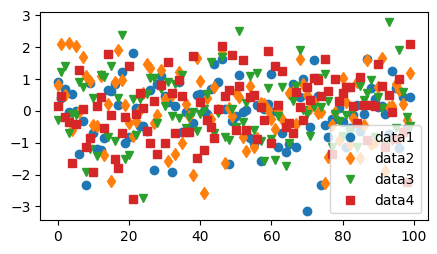

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7))

ax.plot(data1, "o", label="data1")
ax.plot(data2, "d", label="data2")
ax.plot(data3, "v", label="data3")
ax.plot(data4, "s", label="data4")

ax.legend()

## Labelling plots <a class="anchor" id="Labelling_plots"></a> [&#11014;](#Outline)

### Axes labels and text <a class="anchor" id="Axes_labels_and_text"></a> [&#11014;](#Outline)

`~.Axes.set_xlabel`, `~.Axes.set_ylabel`, and `~.Axes.set_title` are used to add text in the indicated locations (see [`Text in Matplotlib Plots`](https://matplotlib.org/stable/tutorials/text/text_intro) for more discussion). Text can also be directly added to plots using `~.Axes.text`:

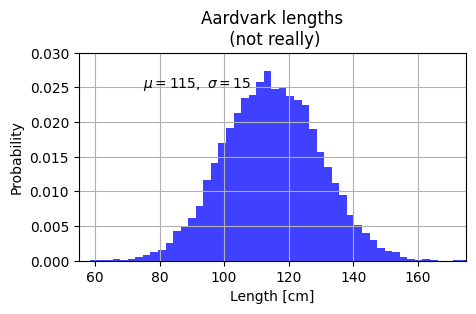

In [13]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)

fig, ax = plt.subplots(figsize=(5, 2.7))

# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor="blue", alpha=0.75)

ax.set_xlabel("Length [cm]")
ax.set_ylabel("Probability")
ax.set_title("Aardvark lengths\n (not really)")
ax.text(75, 0.025, r"$\mu=115,\ \sigma=15$")
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

All of the `~.Axes.text` functions return a `matplotlib.text.Text` instance.

<div class="alert alert-block alert-warning">

Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:
```python
t = ax.set_xlabel('my data', fontsize=14, color='red')
```
</div>

These properties are covered in more detail in [`Text properties and layout`](https://matplotlib.org/stable/tutorials/text/text_props).

### Using mathematical expressions in text <a class="anchor" id="Using_mathematical_expressions_in_text"></a> [&#11014;](#Outline)

Matplotlib accepts $\TeX$ equation expressions in any text expression.
<div class="alert alert-block alert-warning">

For example to write the expression $\sigma_i=15$ in the title, you can write a $\TeX$ expression surrounded by dollar signs:
```python
    ax.set_title(r'$\sigma_i=15$')
```
</div>

where the `r` preceding the title string signifies that the string is a *raw* string and not to treat backslashes as python escapes. Matplotlib has a built-in $\TeX$ expression parser and layout engine, and ships its own math fonts - for details see [`Writing mathematical expressions`](https://matplotlib.org/stable/tutorials/text/mathtext) . You can also use LaTeX directly to format your text and incorporate the output directly into your display figures or saved postscript – see [`Text rendering with LaTeX`](https://matplotlib.org/stable/tutorials/text/usetex).

### Annotations <a class="anchor" id="Annotations"></a> [&#11014;](#Outline)

We can also annotate points on a plot, often by connecting an arrow pointing to *xy*, to a piece of text at *xytext*:

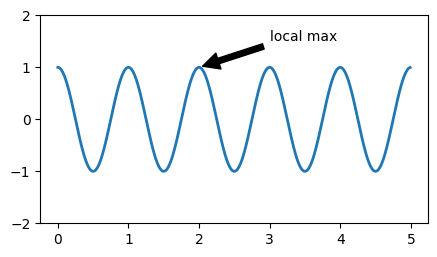

In [14]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)

(line,) = ax.plot(t, s, lw=2)

ax.annotate(
    "local max",
    xy=(2, 1),
    xytext=(3, 1.5),
    arrowprops=dict(facecolor="black", shrink=0.05),
)
ax.set_ylim(-2, 2);

In this basic example, both *xy* and *xytext* are in data coordinates. There are a variety of other coordinate systems one can choose -- see `annotations-tutorial` and `plotting-guide-annotation` for details. More examples also can be found in [`Annotating Plots`](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo).

### Legends <a class="anchor" id="Legends"></a> [&#11014;](#Outline)

Often we want to identify lines or markers with a `.Axes.legend`

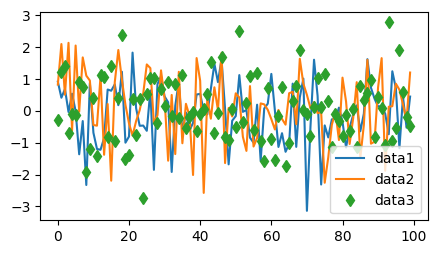

In [15]:
fig, ax = plt.subplots(figsize=(5, 2.7))

ax.plot(np.arange(len(data1)), data1, label="data1")
ax.plot(np.arange(len(data2)), data2, label="data2")
ax.plot(np.arange(len(data3)), data3, "d", label="data3")

ax.legend()

Legends in Matplotlib are quite flexible in layout, placement, and what Artists they can represent. They are discussed in detail in [`Legend guide`](https://matplotlib.org/stable/tutorials/intermediate/legend_guide).

## Axis scales and ticks <a class="anchor" id="Axis_scales_and_ticks"></a> [&#11014;](#Outline)

Each Axes has two (or three) `~.axis.Axis` objects representing the x- and y-axis. These control the *scale* of the Axis, the tick *locators* and the tick *formatters*. Additional Axes can be attached to display further Axis objects.

### Scales <a class="anchor" id="Scales"></a> [&#11014;](#Outline)

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like `~.Axes.loglog`, `~.Axes.semilogx`, and `~.Axes.semilogy`. There are a number of scales (see [`Scales`](https://matplotlib.org/stable/gallery/scales/scales) for other examples).  Here we set the scale manually:

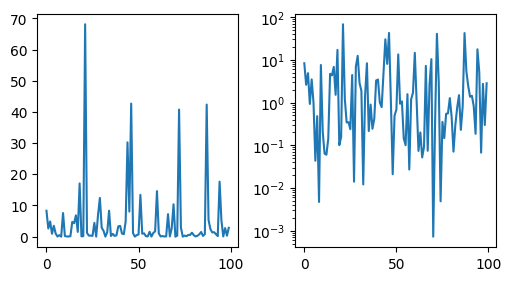

In [16]:
# make an ordinal for this
xdata = np.arange(len(data1))
data = 10**data1

fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout="constrained")

axs[0].plot(xdata, data)
axs[1].plot(xdata, data)

axs[1].set_yscale("log")

The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and gets combined into a *transform*, which is the way that Matplotlib maps from data coordinates to Axes, Figure, or screen coordinates. See [`Transformations Tutorial`](https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial).

### Tick locators and formatters <a class="anchor" id="Tick_locators_and_formatters"></a> [&#11014;](#Outline)

Each Axis has a tick *locator* and *formatter* that choose where along the Axis objects to put tick marks. A simple interface to this is `~.Axes.set_xticks`:

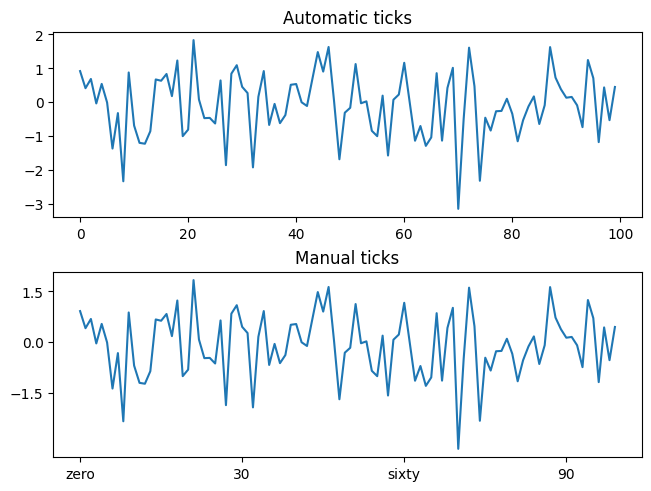

In [17]:
fig, axs = plt.subplots(2, 1, layout="constrained")

axs[0].plot(xdata, data1)
axs[1].plot(xdata, data1)

axs[0].set_title("Automatic ticks")
axs[1].set_title("Manual ticks")
axs[1].set_xticks(np.arange(0, 100, 30), ["zero", "30", "sixty", "90"])
axs[1].set_yticks([-1.5, 0, 1.5])
# note that we don't need to specify labels

Different scales can have different locators and formatters; for instance the log-scale above uses `~.LogLocator` and `~.LogFormatter`. See [`Tick locators`](https://matplotlib.org/stable/gallery/ticks/tick-locators) and [`Tick formatters`](https://matplotlib.org/stable/gallery/ticks/tick-formatters) for other formatters and locators and information for writing your own.

### Plotting dates and strings <a class="anchor" id="Plotting_dates_and_strings"></a> [&#11014;](#Outline)

Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate. For dates:

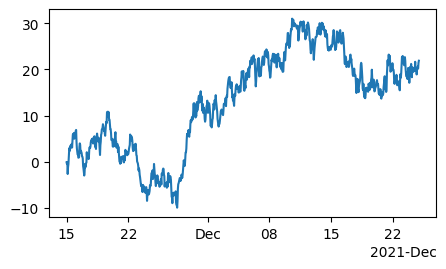

In [18]:
dates = np.arange(
    np.datetime64("2021-11-15"), np.datetime64("2021-12-25"), np.timedelta64(1, "h")
)
data = np.cumsum(np.random.randn(len(dates)))

fig, ax = plt.subplots(figsize=(5, 2.7))

ax.plot(dates, data)

cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

For more information see the date examples (e.g. [`Date tick labels`](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date))

For strings, we get categorical plotting (see [`Plotting categorical variables`](https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables)).

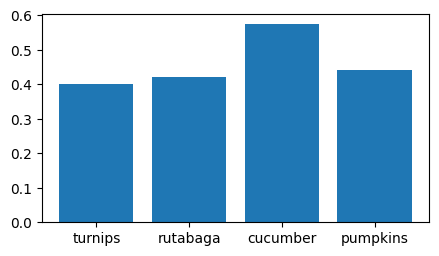

In [19]:
categories = ["turnips", "rutabaga", "cucumber", "pumpkins"]

fig, ax = plt.subplots(figsize=(5, 2.7))

ax.bar(categories, np.random.rand(len(categories)));

One caveat about categorical plotting is that some methods of parsing text files return a list of strings, even if the strings all represent numbers or dates. If you pass $1000$ strings, Matplotlib will think you meant $1000$ categories and will add $1000$ ticks to your plot!

### Additional Axis objects <a class="anchor" id="Additional_Axis_objects"></a> [&#11014;](#Outline)

Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using `~.Axes.twinx` to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for `~.Axes.twiny`). See [`Plots with different scales`](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales) for another example.

Similarly, you can add a `~.Axes.secondary_xaxis` or `~.Axes.secondary_yaxis` having a different scale than the main Axis to represent the data in different scales or units. See [`Secondary Axis`](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis) for further examples.

Text(0.5, 0, 'Angle [°]')

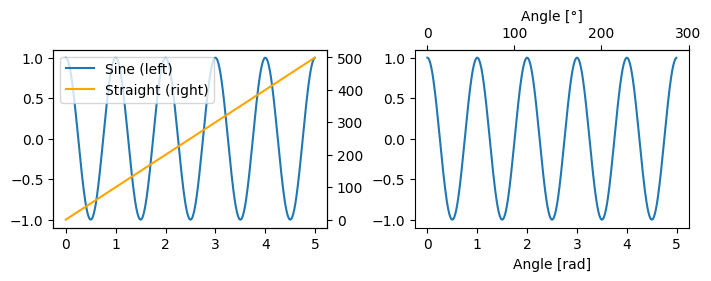

In [20]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout="constrained")

(l1,) = ax1.plot(t, s)
ax2 = ax1.twinx()
(l2,) = ax2.plot(t, range(len(t)), "orange")
ax2.legend([l1, l2], ["Sine (left)", "Straight (right)"])

ax3.plot(t, s)
ax3.set_xlabel("Angle [rad]")

ax4 = ax3.secondary_xaxis("top", functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel("Angle [°]")

## Color mapped data <a class="anchor" id="Color_mapped_data"></a> [&#11014;](#Outline)

Often we want to have a third dimension in a plot represented by a colors in a colormap. Matplotlib has a number of plot types that do this:

Text(0.5, 1.0, 'scatter()')

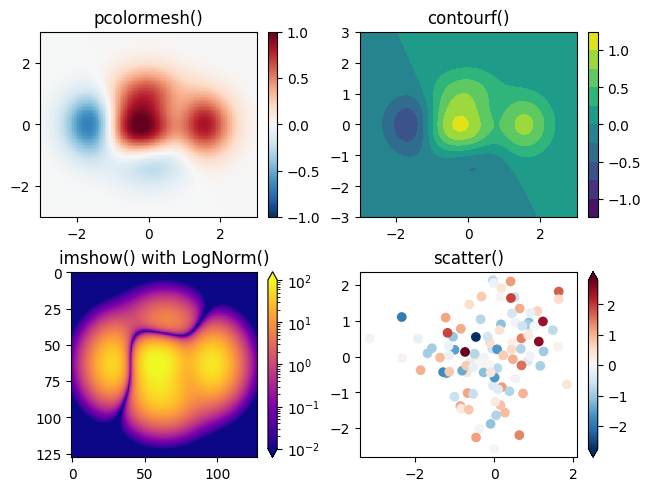

In [21]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X / 2 + X**5 + Y**3) * np.exp(-(X**2) - Y**2)

fig, axs = plt.subplots(2, 2, layout="constrained")

pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title("pcolormesh()")

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title("contourf()")

pc = axs[1, 0].imshow(
    Z**2 * 100, cmap="plasma", norm=mpl.colors.LogNorm(vmin=0.01, vmax=100)
)
fig.colorbar(pc, ax=axs[1, 0], extend="both")
axs[1, 0].set_title("imshow() with LogNorm()")

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[1, 1], extend="both")
axs[1, 1].set_title("scatter()")

### Colormaps <a class="anchor" id="Colormaps"></a> [&#11014;](#Outline)

These are all examples of Artists that derive from  `~.ScalarMappable` objects. They all can set a linear mapping between *vmin* and *vmax* into the colormap specified by *cmap*.  Matplotlib has many colormaps to choose from [`Choosing Colormaps in Matplotlib`](https://matplotlib.org/stable/tutorials/colors/colormaps) you can make your own [`Creating Colormaps in Matplotlib`](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation) or download as [`third-party packages`](https://matplotlib.org/mpl-third-party/#colormaps-and-styles).

### Normalizations <a class="anchor" id="Normalizations"></a> [&#11014;](#Outline)

Sometimes we want a non-linear mapping of the data to the colormap, as in the `LogNorm` example above.  We do this by supplying the ScalarMappable with the *norm* argument instead of *vmin* and *vmax*. More normalizations are shown at [`Colormap Normalization`](https://matplotlib.org/stable/tutorials/colors/colormapnorms).

### Colorbars <a class="anchor" id="Colorbars"></a> [&#11014;](#Outline)

Adding a `~.Figure.colorbar` gives a key to relate the color back to the underlying data. Colorbars are figure-level Artists, and are attached to a ScalarMappable (where they get their information about the norm and colormap) and usually steal space from a parent Axes.  Placement of colorbars can be complex, see [`Placing Colorbars`](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement) for details.  You can also change the appearance of colorbars with the *extend* keyword to add arrows to the ends, and *shrink* and *aspect* to control the size.  Finally, the colorbar will have default locators and formatters appropriate to the norm.  These can be changed as for other Axis objects.

## Working with multiple Figures and Axes <a class="anchor" id="Working_with_multiple_Figures_and_Axes"></a> [&#11014;](#Outline)

You can open multiple Figures with multiple calls to `fig = plt.figure()` or `fig2, ax = plt.subplots()`. By keeping the object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is `plt.subplots()` as used above. One can achieve more complex layouts, with Axes objects spanning columns or rows, using `~.pyplot.subplot_mosaic`.

Text(0.5, 1.0, 'right')

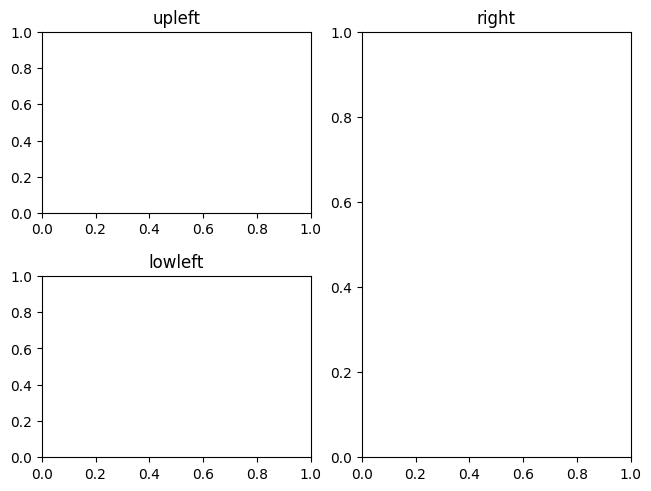

In [22]:
fig, axd = plt.subplot_mosaic(
    [["upleft", "right"], ["lowleft", "right"]], layout="constrained"
)

axd["upleft"].set_title("upleft")
axd["lowleft"].set_title("lowleft")
axd["right"].set_title("right")

Matplotlib has quite sophisticated tools for arranging Axes: See [`Arranging multiple Axes in a Figure`](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes) and [`Complex and semantic figure composition (subplot_mosaic)`](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/mosaic).